# Data Science with pandas

Data analysis heavily depends on the characteristics of the chosen research subject, but we can still identify  main common data analysis steps as follows:
- Define the problem or objective (research question);
- Design/perform experiments and collect data;
- Data Exploration and Visualization;
- Data Cleaning and Preparation;
- Data Analysis and Modelling;
- Result Interpretation;
- Reporting and Visualization.

While tasks like finding a relevant research question and interpreting data are challenges for the critical and analytical skills of the single researcher, all the tasks related to data manipulation, from data reduction and statistical analysis to modelling and visualization, require a systematic use of a quite large variety of software. No need to say that implementing such software yourself from scratch would require a huge amount of time, without even mentioning all the issues related to software mantainance. Luckily for us, people have already devoloped software with specific tools for data analysis. These tools are organised into *packages* or *libraries*, they usually are openly available (according to the programming language you use), and they keep to be mantained and developed by a huge community of users. In particular, for python programmers, the most popular data analysis library is Pandas.

The python library <a url="https://pandas.pydata.org/about/">**Pandas**</a> is a popular open-source data analysis and data manupulation library for Python that started to be developed in 2008. The library is based on two main data structures: *Series* (1D, similar to numpy arrays) and *DataFrame* (2D labeled arrays). Why shall we use Series and DataFrame when we can work with numpy arrays and matrices? Because Pandas has been designed specifically for data manipulation and analysis tasks, providing tools and functions for data cleaning, data transformation, data aggregation, and data visualization, among other data-related tasks. Adopting Pandas, we can run through all the main technical tasks in our data analysis pipeline mainly using a single python library. 

Pandas is widely used in data science, machine learning, and data analysis tasks, as it provides powerful tools for data handling and manipulation, making it easier to work with a large variety of data. Furthermore, it well integrates with other Python libraries for data analysis, machine learning, and statistical analysis, such as NumPy, Scikit-Learn, and StatsModels. 

Overall, Pandas is a powerful and flexible library for data analysis and manipulation in Python, widely used in various domains including data science, finance, business, and research.

In this session we will explore the main features of Pandas going through the main steps of standard data analysis. For this purpose, we will be using data from the <a url="https://figshare.com/articles/dataset/Portal_Project_Teaching_Database/1314459">Portal Project Teaching Database</a>: real world example of life-history, population, and ecological data and, occasionally, small ad hoc dataset to exaplain DataFrame operations.

## Preliminaries

Before we start our journey into Pandas functionalities, there are some preliminary operations to run. 

The Pandas library is not native of python (it is not automatically loaded when you start running python), it needs to be installed and loaded. Assuming you already installed it, let's start importing the Pandas library and checking our installed version.

In [40]:
import pandas as pd
print(pd.__version__)

1.5.0.dev0+845.g9289c46e1


The path of our data files will be specified relatively to the main project folder, so,  in order to properly upload our dataset, it's important to check we are working in there. In order to do that, we will load another library, os, containing all sort of tools to interact with our operating system. The function ```os.getcwd()```, in particular, returns the current working directory (cwd).

In [3]:
import os
cwd = os.getcwd()
print(cwd)

/Volumes/Samsung_T5/uu_job/workshops/workshop-introduction-to-python/book


If the current local directory is <local_dir>/workshop-introduction-to-python, where <local_dir> is whatever directory you chose to download and unzip the course material, you are in the right place.

Let's store the relative path of our data into a variable and let's check if the data file actually exists using the function ```os.path.exists()```

In [41]:
data_file = 'data/surveys.csv'
print(os.path.exists(data_file))

True


If the result is True, we are all set up to go!

### Reading data and quick look (data exploration)

The very first operation we will perform is loading our data into a Pandas **DataFrame** (from now on, only DataFrame). A DataFrame is a Pandas *core object*, i.e. a key component that provides the primary functionality or core features of the entire library. We can convert our data into DataFrame using Pandas functions, they can read a quite large variety of formats like the *comma-separated values* (CSV) file format. In CSV files data values are separated by a comma (","), but files where values are separated by a semicolon (";"), space (" ") or tab ("\t") can also have a .csv extention. Once specified the spacer, Pandas can read all these files with the function ```pd.read_csv()```. The default spacer is a comma, so in our specific case there is no need to specify the separator.

In [42]:
surveys_df = pd.read_csv(data_file)

print(type(data_file))
print(type(surveys_df))

<class 'str'>
<class 'pandas.core.frame.DataFrame'>


The variable ```data_file``` is a string (a word) specifying the location of our file. We use it as the first argument of the function ```pd.read_csv()``` that, indeed, reads the file and returns a DataFrame. In Jupyter Notebook or Jupyter Lab you can visualise the DataFrame simply writing its name in a code cell and running the cell (in the same way you would display the value of any variable). Let's have a look at our just created DataFrame:

In [43]:
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


By looking at the DataFrame we can finally understand what a DataFrame actually is: a 2-dimensional data structure storing different types of variables in columns. Ever DataFrame has an Index (starting from 0) referring to the rows of the table. Columns can be addressed either by their names or by their index, where 0 corresponds to the very first column.

Jupyter does something else for us, it does not show the entire DataFrame as it is too big, instead it shows the first and last 5 rows separated by ... . Simply typing the name of our DataFrame in Jupyter is a great way to start looking at how our data looks like, get familiar with all the columns names, values, and type, and, most importantly, to check for the presence of the infamous NaN (not a number), as these not numeric values are the worst enemies of data analysis scripts.

<div class="alert alert-block alert-success">
<b>TRY IT YOURSELF:</b> Type the following commands and check out the outputs. Can you tell what each command does? What is the difference between commands with and without parenthesis?
</div>

```python
surveys_df.shape
surveys_df.columns
surveys_df.index
surveys_df.dtypes
surveys_df.head(<try_various_integers_here>)
surveys_df.tail(<try_various_integers_here>)
```

## Basic statistics

It's time to perform some basic statistics on our dataset. There is nothing to worry about, Pandas has been specifucally designed for data analysis, so Pandas datastructures have plenty of attributes and methods for our needs (you can always visualise detailed information about attributes and methods of any python object running ```help(<object>)```). Let's first visualise all the column names in the DataFrame

In [8]:
print(surveys_df.columns)

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')


We can use the loop statements we learned about this morning to print the DataFrame column one by one:

In [9]:
for column in surveys_df.columns:
    print(column)

record_id
month
day
year
plot_id
species_id
sex
hindfoot_length
weight


Let's select the column *weight* in our DataFrame and let's run some statistics on it

In [10]:
weight = surveys_df['weight']
print(type(weight))

<class 'pandas.core.series.Series'>


*weight* is another Pandas core object, a **Series**. You can think at a Series as a python list, or numpy array, with extra powers. One of these extra powers allows us to make a simple plot, just to have a first glance at the data. As this is the first plot of this session, we specify the command ```%matplotlib inline```, in this way jupyter lab or notebook will print the plot in the current notebook instead of opening a new window.

<AxesSubplot:ylabel='Frequency'>

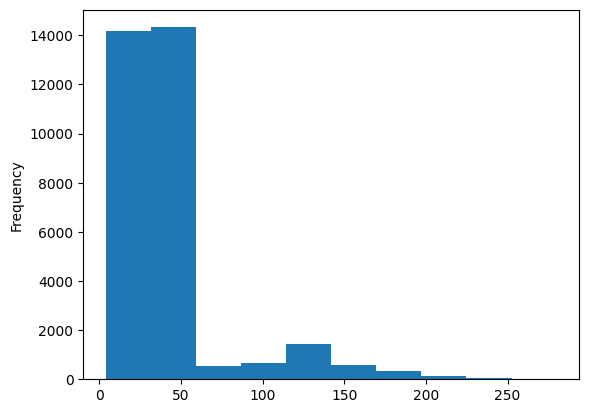

In [11]:
%matplotlib inline
weight.plot(kind='hist')

Did you notice how easy it was to obtain a summary plot of a column of our DataFrame? We can repeat the same for every column with a single line of code.

<AxesSubplot:ylabel='Frequency'>

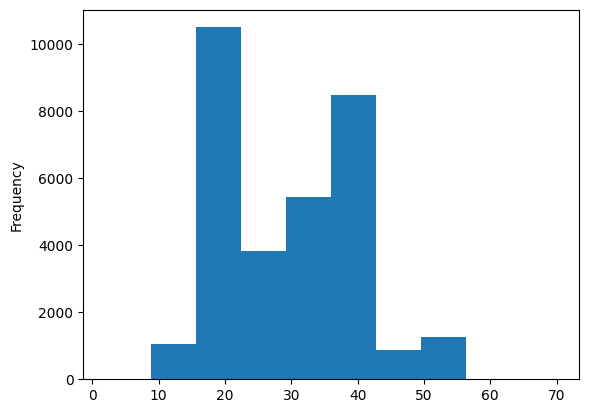

In [44]:
surveys_df['hindfoot_length'].plot(kind='hist')

<div class="alert alert-block alert-success">
<b>TRY IT YOURSELF:</b> Perform some basic statistics on the weight column. Can you tell what each method listed below does? Look at our explorative plot, does the statistics make sense?
</div>

```python
weight.min()
weight.max()
weight.mean()
weight.std()
weight.counts()
```

For each Series we have, instead of running the methods above one by one, we can obtain a statistical summary using the method ```.describe()```. Let's get a statistical summary for the weight column.

In [14]:
weight.describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

```.describe()``` is just one of the many Series and DataFrame methods. There are methods to remove duplicates, to sort values in a particular order, to filter data according to custom criteria, etc (you can always check the Pandas documentation for more information). One of these methods, ```.nunique()```, returns the number of unique elements in a Series. Comparing this number with the length of the Series allows us to check if all the values of a column are unique.

In [15]:
print(len(surveys_df['plot_id']))
print(surveys_df['plot_id'].nunique())

35549
24


In this case the column plot_id has only 24 unique elements, while the total number of elements (computed applying the function ```len()```) is 35549. We definetively have repeated values in that column. Checking if there are repeating elements in a DataFrame column is one of the most important operation in data analysis and introduces the next topic of this session: grouping.